<a href="https://colab.research.google.com/github/hariskhan-hk/Albumentations-Image-Augmentation/blob/main/Albumentations_Image_Augmentation_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enhance Your Computer Vision Models with Albumentations

## 1. Importing Dependencies

In [10]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 2. Load the image

In [11]:
image_path = "HK..jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## 3. Define all transformations

In [12]:
transformations = {
    "Original": None,
    "Horizontal Flip": A.Compose([A.HorizontalFlip(p=1.0)]),
    "Rotate (±15°)": A.Compose([A.Rotate(limit=15, p=1.0)]),
    "Brightness & Contrast": A.Compose([A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1.0)]),
    "Hue & Saturation": A.Compose([A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=1.0)]),
    "Motion Blur": A.Compose([A.MotionBlur(blur_limit=7, p=1.0)]),
    "CLAHE (Detail Boost)": A.Compose([A.CLAHE(clip_limit=4.0, tile_grid_size=(8, 8), p=1.0)]),
    "Coarse Dropout": A.Compose([A.CoarseDropout(max_holes=8, max_height=16, max_width=16, p=1.0)]),
    "RGB Shift": A.Compose([A.RGBShift(r_shift_limit=20, g_shift_limit=15, b_shift_limit=15, p=1.0)]),
    "Random Rain": A.Compose([A.RandomRain(drop_length=20, drop_width=1, blur_value=2, brightness_coefficient=0.9, p=1.0)]),
    "Gaussian Noise": A.Compose([A.GaussNoise(var_limit=(10.0, 50.0), p=1.0)]),
    "ISO Noise": A.Compose([A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.5), p=1.0)]),
    "Elastic Distortion": A.Compose([A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=1.0)])
}

<ipython-input-12-f40e8425ea8e>:9: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  "Coarse Dropout": A.Compose([A.CoarseDropout(max_holes=8, max_height=16, max_width=16, p=1.0)]),
<ipython-input-12-f40e8425ea8e>:12: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  "Gaussian Noise": A.Compose([A.GaussNoise(var_limit=(10.0, 50.0), p=1.0)]),
<ipython-input-12-f40e8425ea8e>:14: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  "Elastic Distortion": A.Compose([A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=1.0)])


## 4. Function to display augmented images

In [13]:
def display_transformations(image, transforms_dict, cols=3):
    total = len(transforms_dict)
    rows = (total + cols - 1) // cols
    plt.figure(figsize=(5 * cols, 5 * rows))

    for idx, (name, transform) in enumerate(transforms_dict.items()):
        if transform is not None:
            augmented = transform(image=image)
            transformed_img = augmented["image"]
        else:
            transformed_img = image  # original

        plt.subplot(rows, cols, idx + 1)
        plt.imshow(transformed_img)
        plt.title(name)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

## 5. Display all transformations

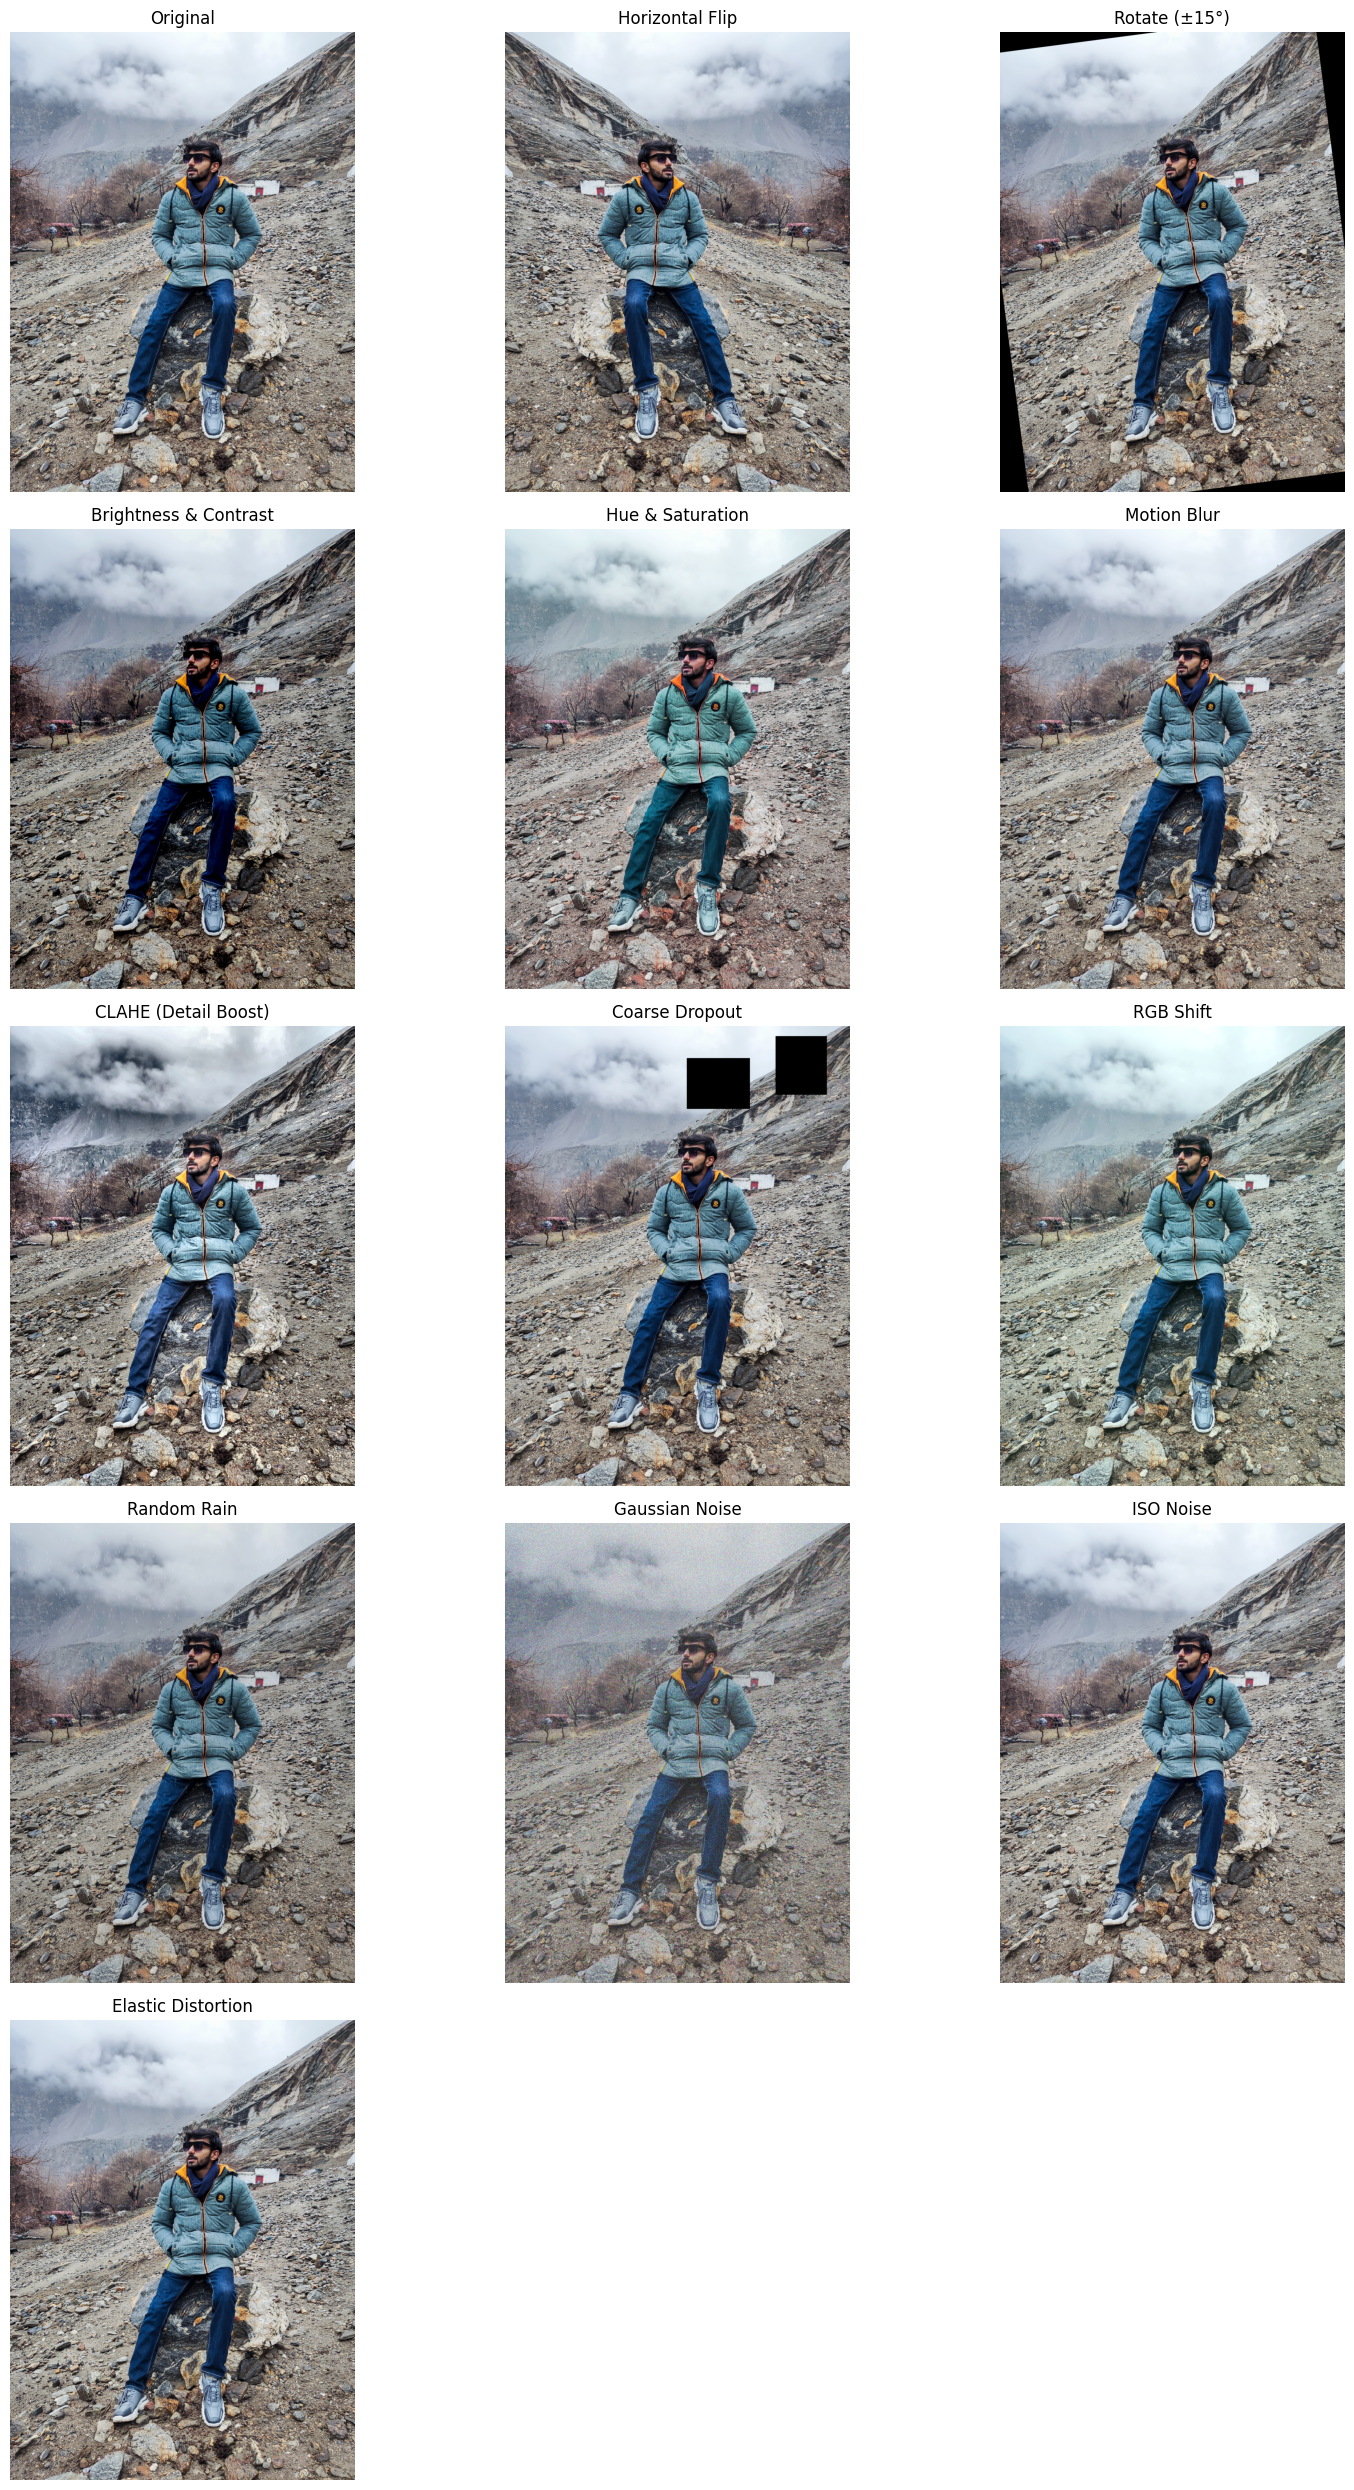

In [14]:
display_transformations(image, transformations, cols=3)